# Importation des bibliothèques


In [5]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Chargement des données

In [1]:
!unzip hmnist_28_28_RGB.csv.zip

unzip:  cannot find or open hmnist_28_28_RGB.csv.zip, hmnist_28_28_RGB.csv.zip.zip or hmnist_28_28_RGB.csv.zip.ZIP.


In [6]:
#Dataset utilisée: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path='/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv'

In [7]:
df=pd.read_csv(path)

In [8]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Séparation de données d'entrainement et des données de test

In [11]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

In [ ]:
print(len(test_set))

In [11]:
df.label.unique()

array([2, 6, 4, 1, 5, 3, 0])

In [12]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [13]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [14]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Analyse exploratoire des données et pre-processing

In [16]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

# Viualisation de quelques images

<Axes: ylabel='count'>

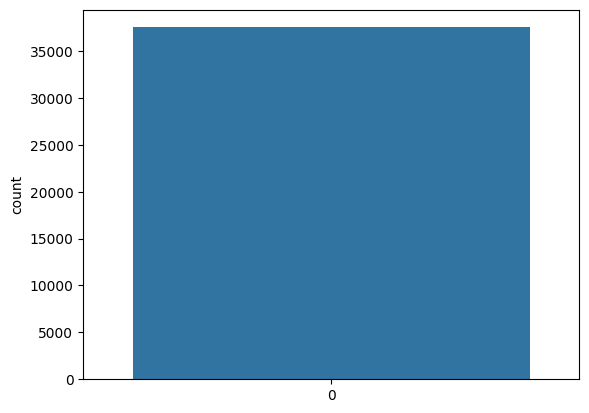

In [17]:
sns.countplot(y_train)

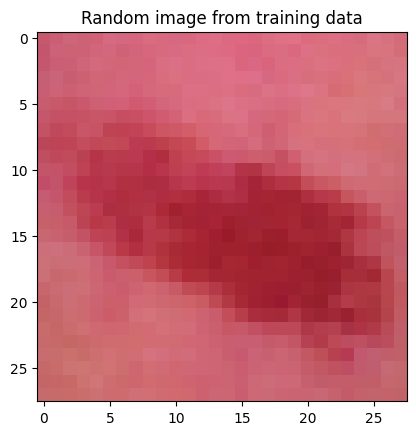

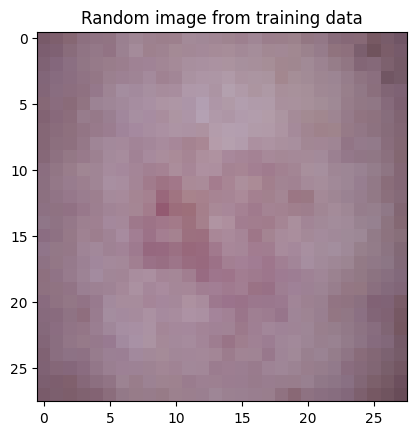

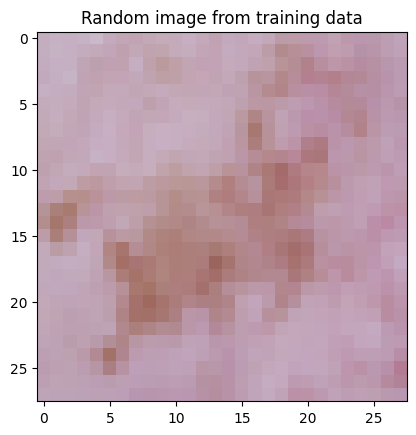

In [18]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Entrainement du modèle  (CNN1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [21]:
 

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

# Optimization des hyper-paramètres :

---



In [22]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [23]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


# Fitting du modèle

In [24]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
235/235 [==============================] - 13s 13ms/step - loss: 1.2110 - accuracy: 0.5619 - val_loss: 1.9501 - val_accuracy: 0.3236
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4613 - accuracy: 0.8455 - val_loss: 1.3138 - val_accuracy: 0.4895
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2852 - accuracy: 0.9028 - val_loss: 1.3362 - val_accuracy: 0.4935
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2155 - accuracy: 0.9288 - val_loss: 0.9000 - val_accuracy: 0.6494
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1831 - accuracy: 0.9359 - val_loss: 1.0946 - val_accuracy: 0.5704
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1512 - accuracy: 0.9462 - val_loss: 0.9602 - val_accuracy: 0.6204
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1353 - accuracy: 0.9517 - val_loss: 0.5570 - val_accuracy

In [25]:
import pickle
training_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy']
}
with open('training_history.pkl', 'wb') as file:
    pickle.dump(training_history, file)
model.save('trained_model.h5')

print("Training history and model saved successfully.")

Training history and model saved successfully.


[0.561860978603363, 0.8454723954200745, 0.9027541875839233, 0.9288307428359985, 0.9359243512153625, 0.9461817741394043, 0.9516768455505371, 0.9603356719017029, 0.9630998969078064, 0.9685283303260803, 0.9708928465843201, 0.972757875919342, 0.9793186187744141, 0.972091794013977, 0.9797515273094177, 0.9820827841758728, 0.9830818772315979, 0.9870116710662842, 0.9880107641220093, 0.9822493195533752, 0.9856129288673401, 0.9899756908416748, 0.9890099167823792, 0.9876444339752197, 0.9883771538734436, 0.9888767004013062, 0.9914077520370483, 0.9900755882263184, 0.9935058355331421, 0.992373526096344, 0.9918739795684814, 0.993439257144928, 0.992506742477417, 0.991441011428833, 0.9933393001556396, 0.9953042268753052, 0.9933726191520691, 0.9926732778549194, 0.9907083511352539, 0.9964698553085327, 0.9965031743049622, 0.9950044751167297, 0.9964365363121033, 0.9938721656799316, 0.9920737743377686, 0.9970027208328247, 0.9973024129867554, 0.9950711131095886, 0.9952709078788757, 0.9966696500778198, 0.9949

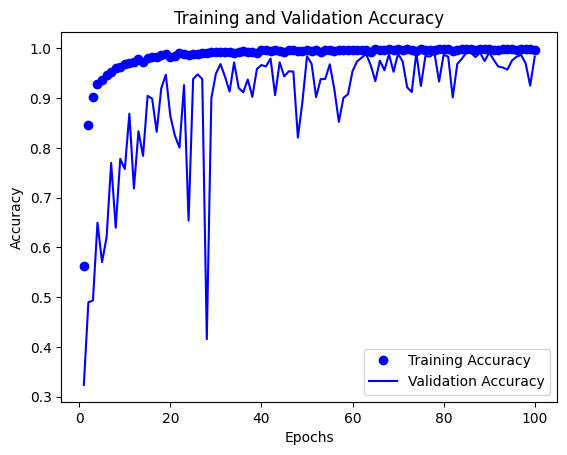

In [22]:
import pickle
import matplotlib.pyplot as plt

# Load the training history from the pickle file
with open('/kaggle/input/models4/training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

# Retrieve accuracy values from the loaded history
accuracy = loaded_history['accuracy']
val_accuracy = loaded_history['val_accuracy']

# Plot the accuracy over epochs
epochs = range(1, len(accuracy) + 1)
print(accuracy[-1])
print(val_accuracy[-1])
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluation du modèle

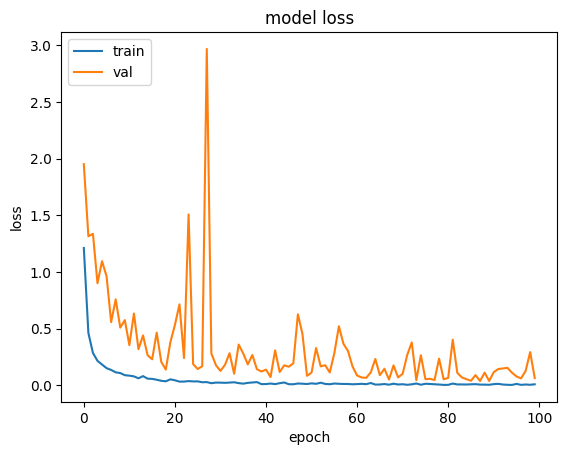

In [27]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 5ms/step - loss: 1.8523 - accuracy: 0.7204


# Test du fonctionnement et résultat


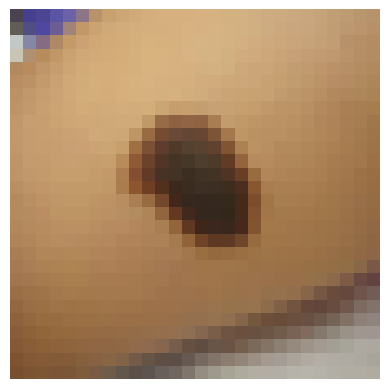

1/1 [==============================] - 0s 382ms/step
[1.3661029e-09 1.8999809e-07 5.2918342e-08 6.8466361e-09 9.9999690e-01
 2.6479076e-06 2.2565607e-07]
('nv', ' melanocytic nevi')


In [29]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
image = PIL.Image.open('/kaggle/input/testimage/3.jpeg')
image = image.resize((28, 28))
img = np.array(image)

plt.imshow(img)
plt.axis('off') 
plt.show()
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


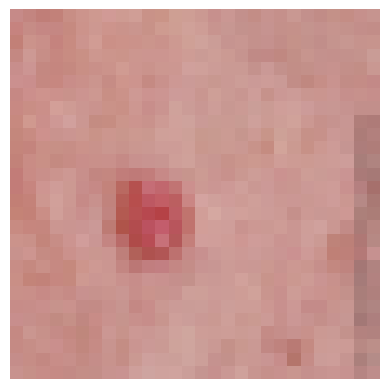

1/1 [==============================] - 0s 38ms/step
[2.6995054e-04 7.6810464e-02 2.4188072e-03 1.3191159e-03 1.1270624e-02
 9.0599328e-01 1.9177600e-03]
('vasc', ' pyogenic granulomas and hemorrhage')


In [30]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO 
'''image_url = "https://m4b6f3p8.rocketcdn.me/app/uploads/2021/04/basalCellCarcinomaBCC_6163_lg.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))'''
image = PIL.Image.open('/kaggle/input/testingimage/basalCellCarcinomaBCC_6163_lg.jpg')
image = image.resize((28, 28))
img = np.array(image)
plt.imshow(img)
plt.axis('off')
plt.show()
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])
